In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement_college.csv')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [4]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


<Axes: xlabel='cgpa', ylabel='package'>

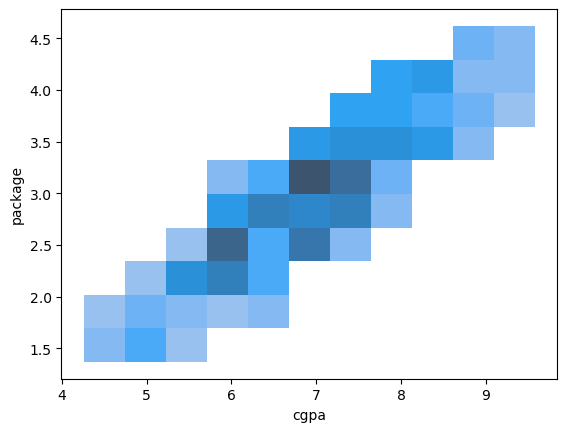

In [7]:
sns.histplot(data=df,x="cgpa",y="package")

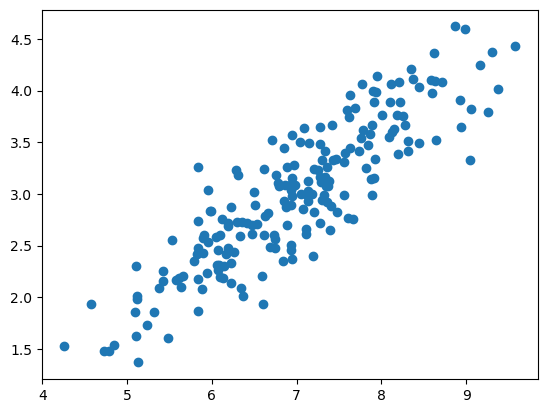

In [8]:
plt.scatter(df['cgpa'],df['package'])

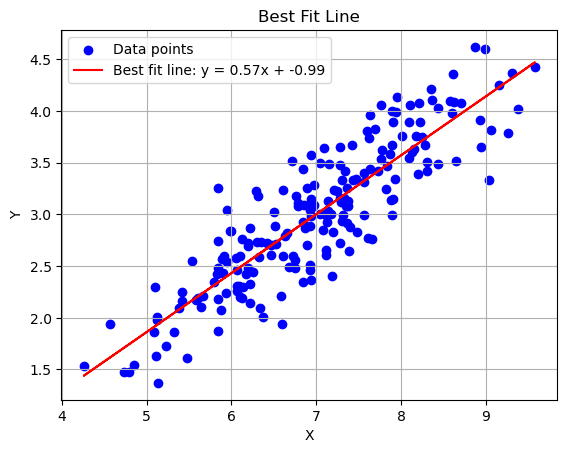

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (you can replace this with your dataset)
x = np.array(df['cgpa'])
y = np.array(df['package'])

# Calculate the best-fit line parameters
# Formula: m = covariance(x, y) / variance(x), c = mean(y) - m * mean(x)
m, c = np.polyfit(x, y, 1)  # Degree 1 gives a linear fit

# Generate y values for the best-fit line
y_fit = m * x + c

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the best-fit line
plt.plot(x, y_fit, color='red', label=f'Best fit line: y = {m:.2f}x + {c:.2f}')

# Add labels, title, and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\parvez\AppData\Local\Temp\ipykernel_9660\2110266471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"],hist=True)
C:\Users\parvez\AppData\Local\Temp\ipykernel_9660\2110266471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["package"],hist=True)


<Axes: xlabel='package', ylabel='Density'>

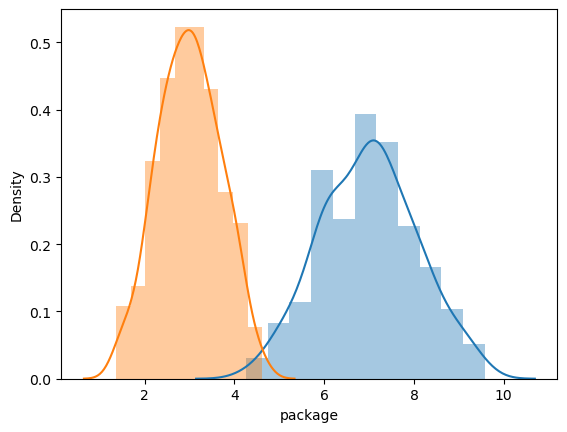

In [10]:
sns.distplot(df["cgpa"],hist=True)
sns.distplot(df["package"],hist=True)

<Axes: xlabel='cgpa', ylabel='package'>

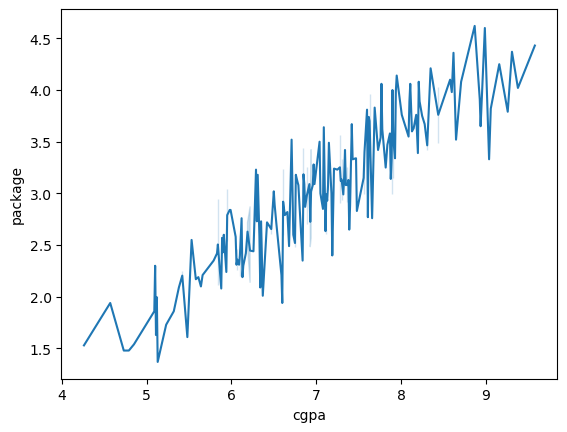

In [11]:
sns.lineplot(data=df,x='cgpa',y='package')

<Axes: ylabel='cgpa'>

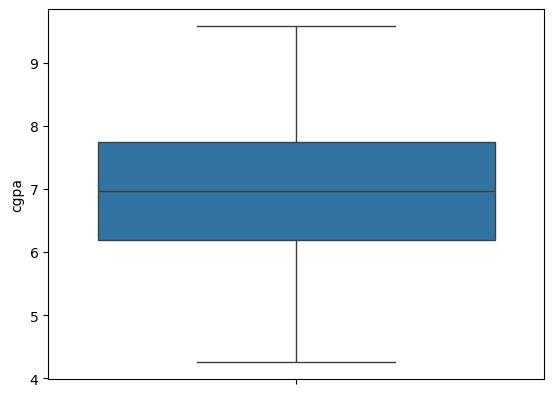

In [12]:
sns.boxplot(df['cgpa'])

<Axes: ylabel='package'>

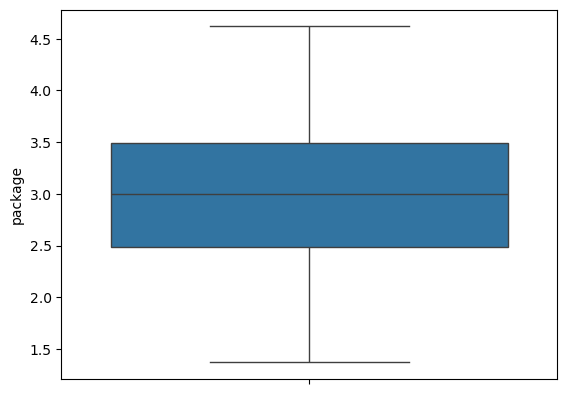

In [13]:
sns.boxplot(df['package'])

In [14]:
df['XY']=df["cgpa"]*df["package"]

In [15]:
df['X^2']=df['cgpa']*df['cgpa']

In [16]:
df

,cgpa,package,XY,X^2
0,6.89,3.26,22.4614,47.4721
1,5.12,1.98,10.1376,26.2144
2,7.82,3.25,25.4150,61.1524
3,7.42,3.67,27.2314,55.0564
4,6.94,3.57,24.7758,48.1636
...,...,...,...,...
195,6.93,2.46,17.0478,48.0249
196,5.89,2.57,15.1373,34.6921
197,7.21,3.24,23.3604,51.9841
198,7.63,3.96,30.2148,58.2169


In [17]:
def predict_y(row):
    y_pred = a0+a1*row['cgpa']
    return y_pred

In [18]:
def ols_regression(df):
    x_bar = df['cgpa'].mean()
    y_bar = df['package'].mean()
    xy_bar = df['XY'].mean()
    x2_bar = df['X^2'].mean()
    a1 = (xy_bar-(x_bar*y_bar))/(x2_bar-(x_bar**2))
    a0 = y_bar-(a1*x_bar)
    return a0,a1

In [19]:
a0,a1=ols_regression(df)
print('Slope:', a1, 'Intercept:', a0)

Slope: 0.5695912947937483 Intercept: -0.9856779462556973


In [20]:
df['y_pred']= df.apply(predict_y,axis=1)

In [21]:
df

,cgpa,package,XY,X^2,y_pred
0,6.89,3.26,22.4614,47.4721,2.938806
1,5.12,1.98,10.1376,26.2144,1.930629
2,7.82,3.25,25.4150,61.1524,3.468526
3,7.42,3.67,27.2314,55.0564,3.240689
4,6.94,3.57,24.7758,48.1636,2.967286
...,...,...,...,...,...
195,6.93,2.46,17.0478,48.0249,2.961590
196,5.89,2.57,15.1373,34.6921,2.369215
197,7.21,3.24,23.3604,51.9841,3.121075
198,7.63,3.96,30.2148,58.2169,3.360304


In [22]:
# Function to calculate error and accuracy
def calculate_error_accuracy(y_true, y_pred):
    # Convert inputs to numpy arrays for vectorized calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)
    
    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Calculate R-squared (coefficient of determination)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    return {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2
    }

In [23]:
y_true = df['package']# True y values
y_pred = df['y_pred']  # Predicted y values

results = calculate_error_accuracy(y_true, y_pred)
print("Error and Accuracy Metrics:")
print(results)

Error and Accuracy Metrics:
{'Mean Squared Error': 0.10680073799744795, 'Mean Absolute Error': 0.25962660834195483, 'R-squared': 0.7756192256051151}


In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.7756


# gradient_descent

In [25]:
df1 = df.copy()
df1=df1.drop(['y_pred','XY','X^2'],axis=1)

In [26]:
df1

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [27]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Convert to numpy arrays for easier matrix operations
    X = np.array(X)
    y = np.array(y)
    
    # Initialize parameters
    w = 0  # weight (slope)
    b = 0  # bias (intercept)
    
    n = len(y)  # Number of data points
    losses = []  # To store loss at each epoch
    
    for epoch in range(epochs):
        # Predictions
        y_pred = w * X + b
        
        # Calculate loss (Mean Squared Error)
        loss = np.mean((y - y_pred) ** 2)
        losses.append(loss)
        
        # Calculate gradients
        dw = -(2/n) * np.sum(X * (y - y_pred))  # Partial derivative w.r.t. w
        db = -(2/n) * np.sum(y - y_pred)       # Partial derivative w.r.t. b
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        # print("weight : ",w," Bias : ",b," Loss : ",loss)   
    return w, b, losses

In [28]:
# Dataset
X = df1['cgpa']
y = df1['package']

# Perform gradient descent
learning_rate = 0.01
epochs = 10000

w, b, losses = gradient_descent(X, y, learning_rate, epochs)

print(f"Weight (slope): {w}")
print(f"Bias (intercept): {b}")
print(f"Final Loss: {losses[-1]}")

Weight (slope): 0.5679099017999781
Bias (intercept): -0.9736558390692727
Final Loss: 0.1068040299208948


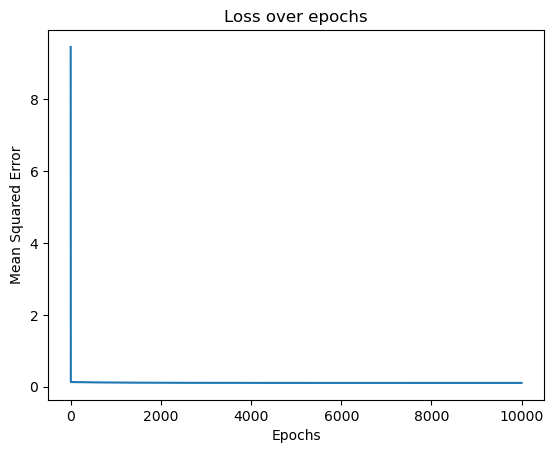

In [29]:
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

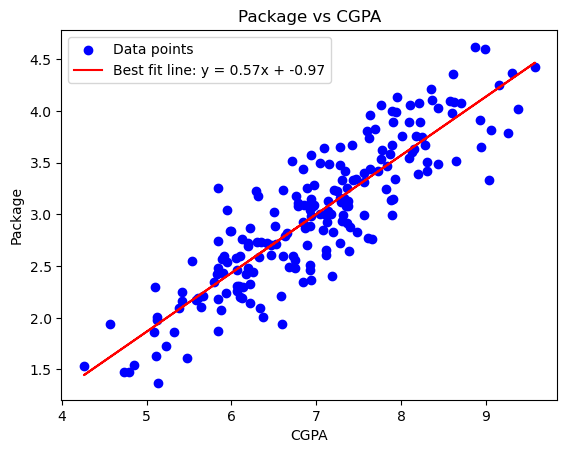

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, w * X + b, color='red', label=f'Best fit line: y = {w:.2f}x + {b:.2f}')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Package vs CGPA')
plt.legend()
plt.show()


In [31]:
df1

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [32]:
def predict_y_grad(row):
    y_pred = b+(w*row['cgpa'])
    return y_pred

In [33]:
df1['y_pred_grad']= df1.apply(predict_y_grad,axis=1)

In [34]:
df1

,cgpa,package,y_pred_grad
0,6.89,3.26,2.939243
1,5.12,1.98,1.934043
2,7.82,3.25,3.467400
3,7.42,3.67,3.240236
4,6.94,3.57,2.967639
...,...,...,...
195,6.93,2.46,2.961960
196,5.89,2.57,2.371333
197,7.21,3.24,3.120975
198,7.63,3.96,3.359497


In [35]:
from sklearn.metrics import r2_score

In [36]:
# Example
y_true_grad = df1['package']
y_pred_grad = df1['y_pred_grad']
r2 = r2_score(y_true_grad, y_pred_grad)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.7756
